# Basic Data Handling and Processing
In this notebook we will, preprocess the data first and visualise it using matplotlib

## Modules
The modules or library we are using here is `matplotlib` for data visualization and `numpy` for calcuations and stuff

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Dataset (TV marketing)
This project utilizes TV marketing dataset from Kaggle: [Here!!](https://www.kaggle.com/datasets/devzohaib/tvmarketingcsv/data) and following is the attributes it has:

- `TV`:     Represent amount in ($) spent on TV advertisements 
- `sales`:  Represent sales done after advertising the product/service

In [3]:
data = np.genfromtxt('data/raw/tvmarketing.csv', delimiter=',', names=True)

## Features and Output

- `X`:  features (TV)
- `Y`:  output (Sales) 

In [4]:
X=data['TV']
Y=data['Sales']
print(f"Money spent on TV sales X: {X[:5]}")
print(f"Money spent on TV sales Y: {Y[:5]}")
print(f"Training Examples X: {X.shape}")
print(f"Training Examples Y: {Y.shape}")
print(f"X range: {np.min(X)} - {np.max(X)}")
print(f"Y range: {np.min(Y)} - {np.max(Y)}")

Money spent on TV sales X: [230.1  44.5  17.2 151.5 180.8]
Money spent on TV sales Y: [22.1 10.4  9.3 18.5 12.9]
Training Examples X: (200,)
Training Examples Y: (200,)
X range: 0.7 - 296.4
Y range: 1.6 - 27.0


### Following will be the plot for the data set:

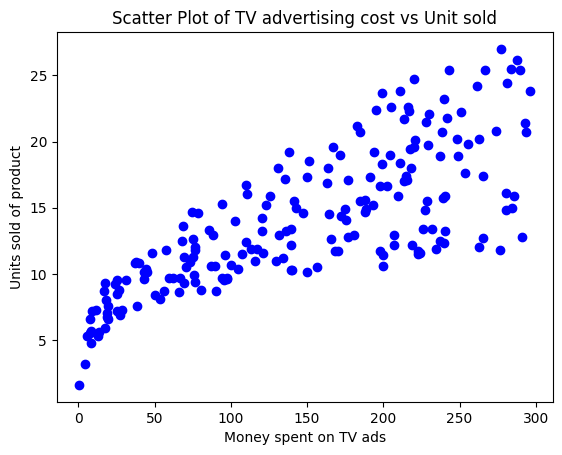

In [7]:

plt.scatter(X, Y,color='blue', label='Data Points')
plt.title('Scatter Plot of TV advertising cost vs Unit sold')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.show()

## Feature Scaling
If we look at the unscaled plot of same data then the plot will look like the output of following code below, the limits of Y is too low then the limit of X, i.e.

- `X`= [0.7 - 296.4]
- `Y`= [1.6 - 27.0]

The `X` values are aggregated in the bottom making the plot look like the plot below. This will be problematic when we find `w` and `b` using **gradient descent**, so we will scale these values using feature scaling techniques **Z-score normalization** and **Mean Normalization** and eventually choose what will be the best for our dataset.


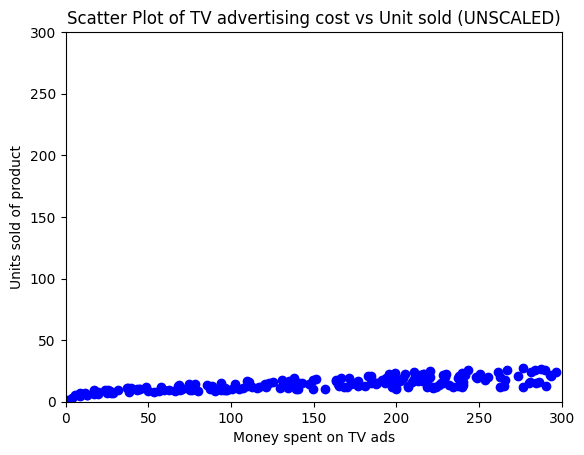

In [15]:
plt.scatter(X, Y,color='blue', label='Data Points')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.title('Scatter Plot of TV advertising cost vs Unit sold (UNSCALED)')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.show()

## Z-Score Normalization
This technique very oftenly used to scale features, following are the steps to scale features using this technique:

- Find Expected Value or Mean (${\sigma}$) of `X` and  `Y`
- Find Standard Deviation(${\mu}$) of `X` and `Y`
- Plug it into the following this formula:

For X:

$$z_x = \frac{x_i - \mu_x}{\sigma_x}$$

For Y:

$$z_y = \frac{y_i - \mu_y}{\sigma_y}$$


the limit will vary from $-\infty$ to $\infty$.

In [16]:
#Z-Score Normalization

#Finding mean
X_mean=np.mean(X)
Y_mean=np.mean(Y)

# Finding standard deviation
stdev_x=np.std(X)
stdev_y=np.std(Y)

# Pluging the findings to expression
Z_X=(X-X_mean)/stdev_x
Z_Y=(Y-Y_mean)/stdev_y

print(f"Money spent on TV sales(X): {Z_X[:5]}")
print(f"Money spent on TV sales(Y): {Z_Y[:5]}")
print()
print(f"X range: {np.min(Z_X):.3f} - {np.max(Z_X):.3f}")
print(f"Y range: {np.min(Z_Y):.3f} - {np.max(Z_Y):.3f}")

Money spent on TV sales(X): [ 0.96985227 -1.19737623 -1.51615499  0.05204968  0.3941822 ]
Money spent on TV sales(Y): [ 1.55205313 -0.69604611 -0.90740587  0.86033029 -0.21568303]

X range: -1.709 - 1.744
Y range: -2.387 - 2.494


### Plot after Z-Score Normalization (Unscaled and Scaled)

Observations:
- The unscaled plot is scattered well just like scaled plot.
- The Gradient Descent will converge faster now
- We correctly implemented the normalization procedure since the Scaled plot of Z values looks identical to the previous values of `X` and `Y`

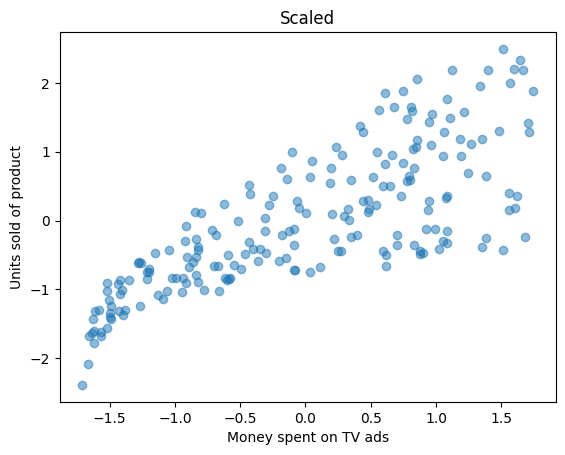

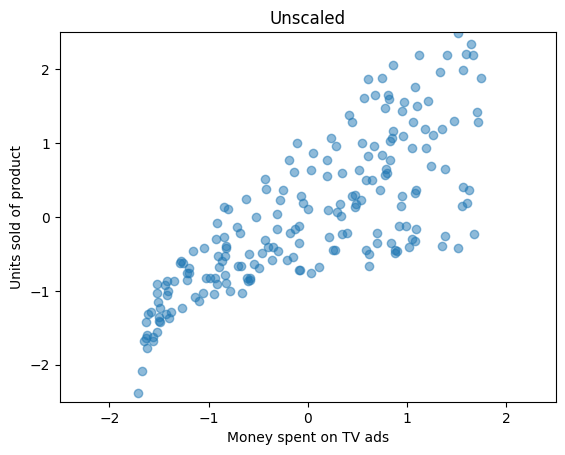

In [22]:
plt.scatter(Z_X,Z_Y,alpha=0.5)
plt.title('Scaled')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.show()

plt.scatter(Z_X,Z_Y,alpha=0.5)
plt.title('Unscaled')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.show()

In [17]:
# Mean Normalization

#Finding minimum value of X
x_min=np.min(X)
y_min=np.min(Y)

#Finding minimum value of Y
x_max=np.max(X)
y_max=np.max(Y)

#Plugging it into the expression
x_scaled=(X-X_mean)/(x_max-x_min)
y_scaled=(Y-Y_mean)/(y_max-y_min)

print(x_scaled[:5])
print(y_scaled[:5])
print()
print(f"X range: {np.min(x_scaled):.3f} - {np.max(x_scaled):.3f}")
print(f"Y range: {np.min(y_scaled):.3f} - {np.max(y_scaled):.3f}")

[ 0.28088434 -0.34677883 -0.43910213  0.0150744   0.11416131]
[ 0.31801181 -0.14261811 -0.1859252   0.17627953 -0.04419291]

X range: -0.495 - 0.505
Y range: -0.489 - 0.511


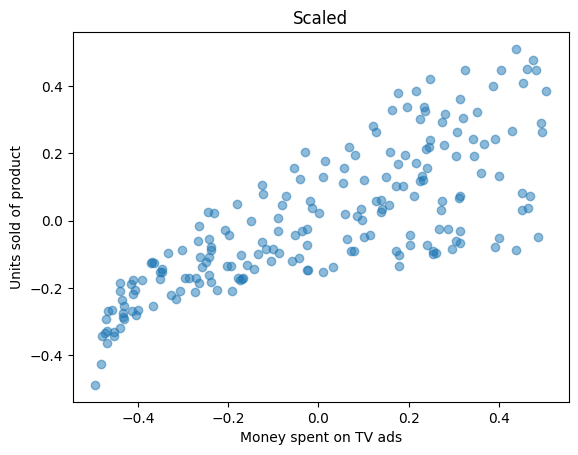

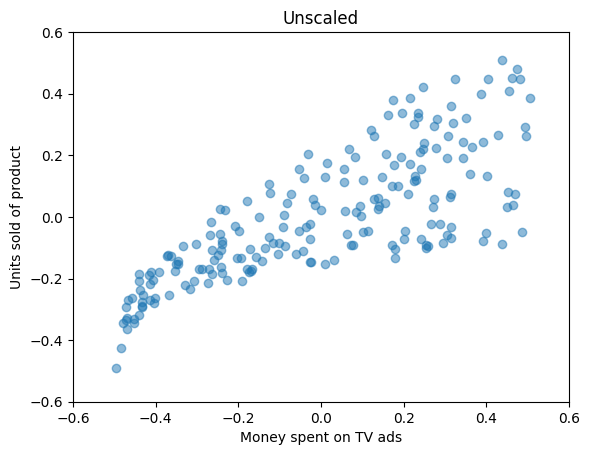

In [21]:
plt.scatter(x_scaled,y_scaled,alpha=0.5)
plt.title('Scaled')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.show()

plt.scatter(x_scaled,y_scaled,alpha=0.5)
plt.title('Unscaled')
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.show()

In [93]:
# Ranges after Z-score Normalization 
print(f"X range:{np.min(Z_X):.3f} - {np.max(Z_X):.3f}")
print(f"Y range:{(np.min(Z_Y)):.3f} - {np.max(Z_Y):.3f}")

# Ranges after Mean Normalization 
print(f"X range:{np.min(x_scaled):.3f} - {np.max(x_scaled):.3f}")
print(f"Y range:{np.min(y_scaled):.3f} - {np.max(y_scaled):.3f}")

X=x_scaled
Y=y_scaled


X range:-1.709 - 1.744
Y range:-2.387 - 2.494
X range:-0.495 - 0.505
Y range:-0.489 - 0.511


In [ ]:
import numpy as np

# Example: Assume X and Y are already defined
N = len(X)  # total samples
train_size = round(N * 0.8)  # 80% training

# Shuffle your data first to avoid bias
indices = np.arange(N)
np.random.shuffle(indices)

# Shuffle X and Y together
X_shuffled = X[indices]
Y_shuffled = Y[indices]

# Split
X_train = X_shuffled[:train_size]
Y_train = Y_shuffled[:train_size]

X_test = X_shuffled[train_size:]
Y_test = Y_shuffled[train_size:]


In [94]:
# Combine X and Y into a 2D array
data_to_save = np.column_stack((X, Y))

# Save to a CSV file
output_path = 'data/processed/tvmarketing_scaled.csv'
np.savetxt(output_path, data_to_save, delimiter=',', header='TV,Sales')

print(f"Data saved to {output_path}")

Data saved to data/processed/tvmarketing_scaled.csv
